In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

In [2]:
from kernelbiome.cfi_and_cpd import *
from kernelbiome.utils_cv import *
from kernelbiome.utils_result import *

/Users/hrt620/.pyenv/versions/3.9.9/envs/kb39/lib/python3.9/site-packages/jax/_src/lib/__init__.py:32: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [3]:
from matplotlib import rc
rc('font', **{'family':'tex-gyre-termes', 'size':6.5})
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsfonts,amssymb,amsthm,amsmath}')

In [4]:
colors_all = np.vstack([plt.cm.tab20c(range(20)),plt.cm.tab20b(range(20))]) # plt.cm.tab10(range(10)), plt.cm.tab20(range(20)), plt.cm.tab20b(range(20)), 
colors_all = np.unique(colors_all, axis=0)
print(colors_all.shape)

(40, 4)


In [5]:
def true_fun(X):
    beta = np.array([2,-1,-1,0])
    return np.log(X).dot(beta)

In [6]:
def d_true_fun(X):
    beta = np.array([2,-1,-1,0])
    return 1/X * beta

In [7]:
rng = np.random.default_rng(2022)

In [8]:
n = 50
p = 4
X = np.exp(rng.normal(0,1,(n,p)))
X /= X.sum(axis=1)[:,None]

In [9]:
cpd_vals = get_cpd(X, X, true_fun)
cfi_vals = get_cfi(X, d_true_fun(X))

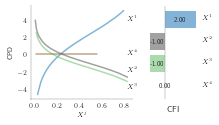

In [13]:
plt.style.use("seaborn-white")
fig, axs = plt.subplots(1,2,gridspec_kw={'width_ratios': [2, 1]})
plot_cpd(X, cpd_vals, labels=[f'$X^{jj+1}$' for jj in range(X.shape[1])], colors=colors_all[::4], axs=axs[0])
axs[0].annotate(r'$X^1$', (0.82,4))
axs[0].annotate(r'$X^4$', (0.82,0))
axs[0].annotate(r'$X^2$', (0.82,-2))
axs[0].annotate(r'$X^3$', (0.82,-4))
plot_cfi(cfi_vals, fmt='%.2f', labels=[f'$X^{jj+1}$' for jj in range(X.shape[1])], colors=colors_all[::4], axs=axs[1], ascending=False)
fig.set_size_inches(3, 1.7)
fig.savefig("output/log_contrast_example.pdf", bbox_inches='tight')